Norm of angle at time step of 42 is 0.820090040523652


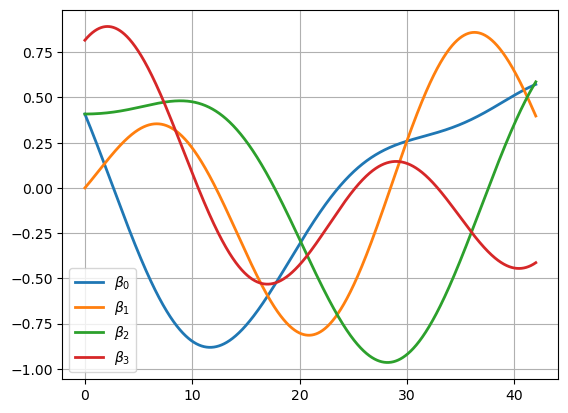

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

def quaternionDynamics(t, quaternion):
    omegaDot = 20*np.pi/180 * np.array([np.sin(0.1*t), 0.01, np.cos(0.1*t)])
    omega = np.array([0, *omegaDot])
    b0, b1, b2, b3 = quaternion
    B = 0.5 * np.array([[b0, -b1, -b2, -b3],
                        [b1,  b0, -b3,  b2],
                        [b2,  b3,  b0, -b1],
                        [b3, -b2,  b1,  b0]])
    quaternion = np.dot(B, omega)
    return quaternion

initialState = np.array([0.408248, 0, 0.408248, 0.816497])
tEnd = 42
step = 0.01
t = np.arange(0, tEnd + step, step)
r = ode(quaternionDynamics).set_integrator('dopri5')
r.set_initial_value(initialState, 0)
sol = np.zeros((len(t), 4))
sol[0] = initialState
i = 1
while r.successful() and r.t < tEnd:
    sol[i] = r.integrate(r.t + step)
    i += 1

norm = np.sqrt(sol[-1, 1]**2 + sol[-1, 2]**2 + sol[-1, 3]**2)
print(f"Norm of angle at time step of {tEnd} is {norm}")

plt.figure(1)
plt.plot(t, sol, linewidth=2)
plt.legend(['$\\beta_{0}$', '$\\beta_{1}$', '$\\beta_{2}$', '$\\beta_{3}$'], loc='best')
plt.grid(True)
plt.show()